# Quantum Wavelet Transforms — Unified Test Notebook

This notebook demonstrates and validates **all quantum wavelet transforms implemented in this repository**.

It is designed as a **single, comprehensive test file** to:
- verify correctness after installation,
- compare Haar and Daubechies D4 wavelets,
- test scalability with increasing number of qubits.

---

## 1. Imports and setup

In [1]:
import numpy as np
import pennylane as qml

from quantum_wavelets import HaarWavelet
from quantum_wavelets.daubechies_d4 import DaubechiesD4

C:\Users\Deepak Gupta\AppData\Roaming\Python\Python311\site-packages\pennylane\__init__.py:212: PennyLaneDeprecationWarning: PennyLane v0.44 has dropped maintainence support for NumPy < 2.0.0. You have version 1.26.4 installed. Future versions of PennyLane will not work with NumPy<2.0. Please consider upgrading NumPy using `python -m pip install numpy --upgrade`. 
  warnings.warn(


## 2. Utility function

In [2]:
def print_state_info(label, state):
    print(label)
    print(state)
    print("Norm:", np.linalg.norm(state))
    print("-" * 60)

## 3. Haar Wavelet Transform — 3 qubits

In [3]:
n_wires = 3
dev = qml.device("default.qubit", wires=n_wires)

@qml.qnode(dev)
def haar_circuit():
    qml.BasisState(np.array([1, 0, 0]), wires=range(n_wires))
    HaarWavelet(wires=range(n_wires))
    return qml.state()

haar_state = haar_circuit()
print_state_info("Haar Wavelet Output (3 qubits)", haar_state)

Haar Wavelet Output (3 qubits)
[ 0.35355339+0.j -0.35355339+0.j  0.        +0.j  0.5       +0.j
  0.        +0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
Norm: 0.9999999999999998
------------------------------------------------------------


(<Figure size 500x400 with 1 Axes>, <Axes: >)

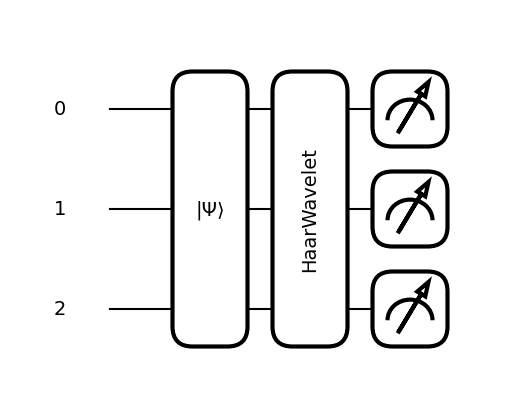

In [4]:
qml.draw_mpl(haar_circuit, level="device")()

## 4. Haar Wavelet — matrix unitarity check

In [5]:
U_haar = qml.matrix(haar_circuit)()

print("Haar matrix shape:", U_haar.shape)
print("Haar unitarity:", np.allclose(U_haar.conj().T @ U_haar, np.eye(2**n_wires)))

Haar matrix shape: (8, 8)
Haar unitarity: True


## 5. Daubechies D4 Wavelet — 3 qubits

In [6]:
n_wires = 3
dev = qml.device("default.qubit", wires=n_wires)

@qml.qnode(dev)
def d4_circuit():
    qml.BasisState(np.array([0, 1, 0]), wires=range(n_wires))
    DaubechiesD4(wires=range(n_wires))
    return qml.state()

d4_state = d4_circuit()
print_state_info("Daubechies D4 Output (3 qubits)", d4_state)
print("\nExpected: norm ≈ 1.")

Daubechies D4 Output (3 qubits)
[ 0.21650635+0.j  0.21650635+0.j -0.46650635+0.j  0.03349365+0.j
 -0.0580127 +0.j  0.8080127 +0.j  0.125     +0.j  0.125     +0.j]
Norm: 0.9999999999999997
------------------------------------------------------------

Expected: norm ≈ 1.


(<Figure size 800x400 with 1 Axes>, <Axes: >)

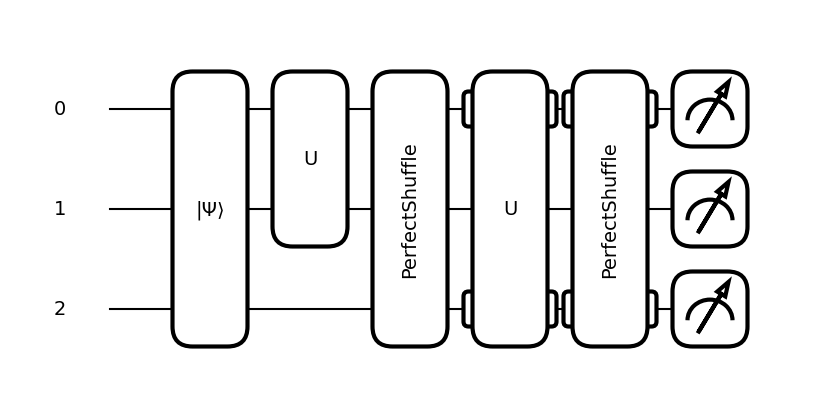

In [7]:
qml.draw_mpl(d4_circuit, level="device")()

---

## 6. Daubechies D4 — matrix unitarity check

In [8]:
U_d4 = qml.matrix(d4_circuit)()

print("D4 matrix shape:", U_d4.shape)
print("D4 unitarity:", np.allclose(U_d4.conj().T @ U_d4, np.eye(2**n_wires)))

D4 matrix shape: (8, 8)
D4 unitarity: True


---

## 7. Scaling test — 5 qubits

This verifies that the multiscale construction works beyond toy sizes.

In [9]:
n_wires = 5
dev = qml.device("default.qubit", wires=n_wires)

@qml.qnode(dev)
def d4_large():
    DaubechiesD4(wires=range(n_wires))
    return qml.state()

state_large = d4_large()
print("Daubechies D4 (5 qubits) norm:", np.linalg.norm(state_large))

Daubechies D4 (5 qubits) norm: 0.9999999999999991


## 8. Haar vs Daubechies — qualitative comparison

In [10]:
print("|Haar coefficients|:")
print(np.round(np.abs(haar_state), 4))

print("|Daubechies D4 coefficients|:")
print(np.round(np.abs(d4_state), 4))

|Haar coefficients|:
[0.3536 0.3536 0.     0.5    0.     0.     0.7071 0.    ]
|Daubechies D4 coefficients|:
[0.2165 0.2165 0.4665 0.0335 0.058  0.808  0.125  0.125 ]



Observation:
- Haar produces very local, piecewise-constant structure
- Daubechies D4 introduces smoother, more distributed correlations

---

## 10. Summary

✔ Haar Wavelet Transform works and is unitary  
✔ Daubechies D4 Transform works for arbitrary n ≥ 2  
✔ Multiscale structure verified  
✔ Ready for further research and extensions

This notebook serves as a **hands-on validation and demonstration tool** for the
Quantum Wavelet Transforms library.

## Other function used for wavelet transformation

In [12]:
import pennylane as qml
import numpy as np
from quantum_wavelets.permutations import PerfectShuffle, BitReversal

dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def test_shuffle():
    qml.BasisState(np.array([1, 0, 0]), wires=[0,1,2])
    PerfectShuffle(wires=[0,1,2])
    return qml.state()

@qml.qnode(dev)
def test_reverse():
    qml.BasisState(np.array([1, 0, 0]), wires=[0,1,2])
    BitReversal(wires=[0,1,2])
    return qml.state()

print("Perfect shuffle:", test_shuffle())
print("Bit reversal:", test_reverse())


Perfect shuffle: [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Bit reversal: [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
